Whether the applicant will get loan or not

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/loan_prediction.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
### Data Understanding

In [7]:
df.shape

(614, 13)

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [10]:
### There are missing records in few columns

In [11]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

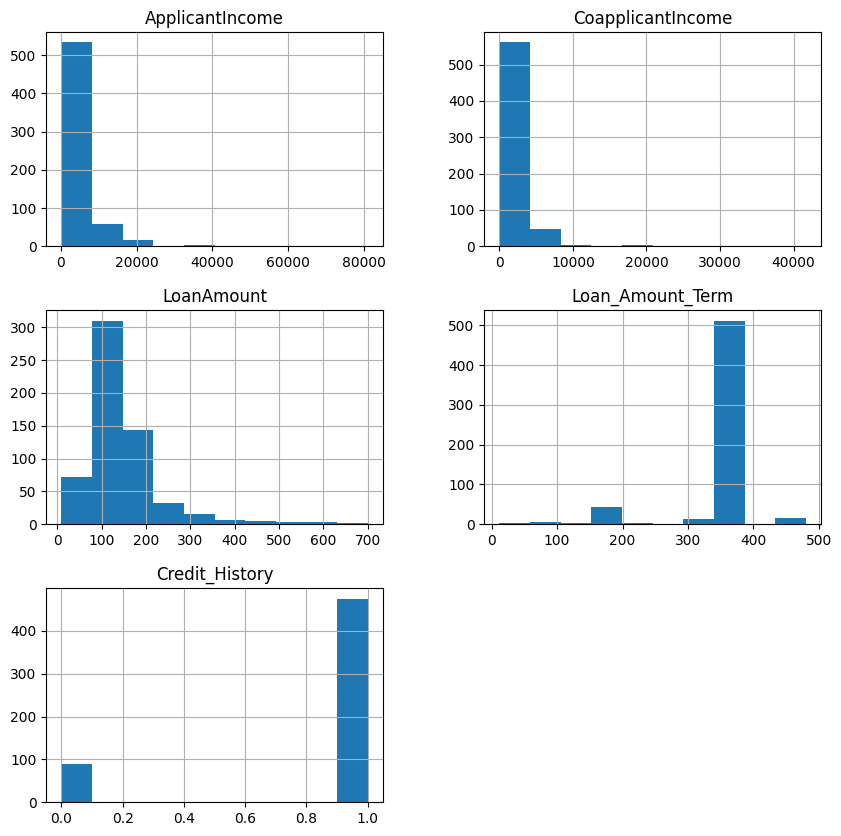

In [12]:
df.hist(figsize=(10,10))

In [13]:
### countplot for Loan_status Vs all the categorical columns

In [14]:
### Chatgpt-> Code for countplot : Categorical vs all categorical columns

In [15]:
### Drop Loan_ID(it not significant)
df=df.drop("Loan_ID",axis=1)

In [16]:
df.shape

(614, 12)

In [17]:
### Replace the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [18]:
loan_med=df["LoanAmount"].median()
loan_med

128.0

In [19]:
df["LoanAmount"]=df["LoanAmount"].replace(np.nan,loan_med)

In [20]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14
Credit_History,50


In [21]:
### Replace missing values with median for loanamountterm and credit history

In [22]:
term_med=df["Loan_Amount_Term"].median()
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].replace(np.nan,term_med)

In [23]:
credit_med=df["Credit_History"].median()
df["Credit_History"]=df["Credit_History"].replace(np.nan,credit_med)

In [24]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [25]:
marr_mode=df["Married"].mode()[0]
df["Married"]=df["Married"].replace(np.nan,marr_mode)

In [26]:
### Replace for Married,Selfemp,dependents

In [27]:
Gender_mode=df["Gender"].mode()[0]
df["Gender"]=df["Gender"].replace(np.nan,Gender_mode)

In [28]:
dep_mode=df["Dependents"].mode()[0]
df["Dependents"]=df["Dependents"].replace(np.nan,dep_mode)

In [29]:
emp_mode=df["Self_Employed"].mode()[0]
df["Self_Employed"]=df["Self_Employed"].replace(np.nan,emp_mode)

In [30]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [31]:
### Drop insignificant???
### Missing value Replacement???
### Categorical columns???-> Encoded

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [33]:
df=pd.get_dummies(df,columns=["Gender","Married","Dependents","Property_Area","Education","Self_Employed"])

In [34]:
df.shape

(614, 21)

In [35]:
df.sample(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
297,4666,0.0,135.0,360.0,1.0,Y,True,False,False,True,...,True,False,False,False,False,True,True,False,True,False
19,2600,3500.0,115.0,360.0,1.0,Y,False,True,False,True,...,False,False,False,False,False,True,True,False,True,False
514,5815,3666.0,311.0,360.0,1.0,N,False,True,True,False,...,False,False,False,True,False,False,True,False,True,False
523,7948,7166.0,480.0,360.0,1.0,Y,False,True,False,True,...,False,True,False,True,False,False,True,False,False,True
341,2378,0.0,46.0,360.0,1.0,N,True,False,True,False,...,False,False,False,True,False,False,True,False,True,False


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Loan_Status              614 non-null    object 
 6   Gender_Female            614 non-null    bool   
 7   Gender_Male              614 non-null    bool   
 8   Married_No               614 non-null    bool   
 9   Married_Yes              614 non-null    bool   
 10  Dependents_0             614 non-null    bool   
 11  Dependents_1             614 non-null    bool   
 12  Dependents_2             614 non-null    bool   
 13  Dependents_3+            614 non-null    bool   
 14  Property_Area_Rural      6

In [37]:
df["Loan_Status"]=df["Loan_Status"].replace({"Y":1,"N":0})

/tmp/ipython-input-647256549.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Loan_Status"]=df["Loan_Status"].replace({"Y":1,"N":0})


In [38]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,128.0,360.0,1.0,1,False,True,True,False,...,False,False,False,False,False,True,True,False,True,False
1,4583,1508.0,128.0,360.0,1.0,0,False,True,False,True,...,True,False,False,True,False,False,True,False,True,False
2,3000,0.0,66.0,360.0,1.0,1,False,True,False,True,...,False,False,False,False,False,True,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,1,False,True,False,True,...,False,False,False,False,False,True,False,True,True,False
4,6000,0.0,141.0,360.0,1.0,1,False,True,True,False,...,False,False,False,False,False,True,True,False,True,False


In [39]:
### No insignificant columns(loan_id-drop)
### Missing values ->0
### No categorical columns

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Loan_Status              614 non-null    int64  
 6   Gender_Female            614 non-null    bool   
 7   Gender_Male              614 non-null    bool   
 8   Married_No               614 non-null    bool   
 9   Married_Yes              614 non-null    bool   
 10  Dependents_0             614 non-null    bool   
 11  Dependents_1             614 non-null    bool   
 12  Dependents_2             614 non-null    bool   
 13  Dependents_3+            614 non-null    bool   
 14  Property_Area_Rural      6

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification
Y=df[["Loan_Status"]]
X=df.drop("Loan_Status",axis=1)

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [43]:
model_lr=LogisticRegression()
model_lr.fit(X_train,Y_train)
print(model_lr.score(X_train,Y_train))
print(model_lr.score(X_test,Y_test))


0.7995337995337995
0.827027027027027


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(max_depth=3)
model_dt.fit(X_train,Y_train)
print(model_dt.score(X_train,Y_train))
print(model_dt.score(X_test,Y_test))

0.8181818181818182
0.8108108108108109


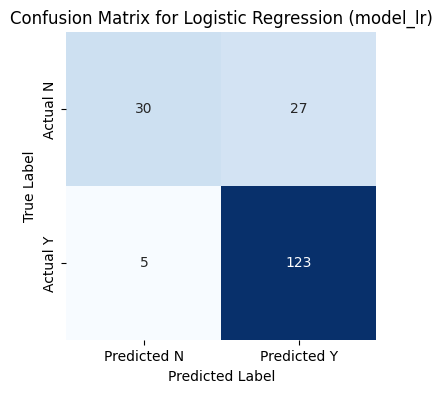

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Y_pred_lr = model_lr.predict(X_test)
cm_lr = confusion_matrix(Y_test, Y_pred_lr)

plt.figure(figsize=(4,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted N', 'Predicted Y'], yticklabels=['Actual N', 'Actual Y'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression (model_lr)')
plt.show()

In [48]:
FN=5
TP=123
TN=30
FP=27

In [51]:
30+123+5+27

185

In [49]:
df.shape

(614, 21)

In [50]:
614*0.3

184.2

In [ ]:
### Test=184.2=185

In [52]:
(TP+TN)/(TP+TN+FP+FN)

0.827027027027027

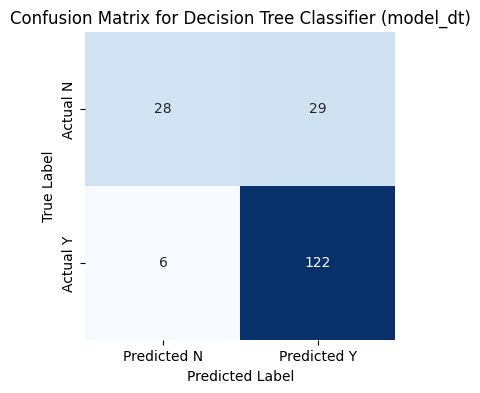

In [53]:

Y_pred_dt = model_dt.predict(X_test)
cm_dt = confusion_matrix(Y_test, Y_pred_dt)

plt.figure(figsize=(4,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted N', 'Predicted Y'], yticklabels=['Actual N', 'Actual Y'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier (model_dt)')
plt.show()

In [54]:
TN=28
FN=6
TP=122
FP=29

In [55]:
(TP+TN)/(TP+TN+FP+FN)

0.8108108108108109